## DATA620 | Assignment 2 Part 1 

This week's assignment is to:
Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.
Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.
Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
Please record a short video (~ 5 minutes), and submit a link to the video as part of your homework submission.


#### Group members: Habib Khan, Vijaya Cherukuri, Priya Shaji, Abdellah Ait Elmouden

### You Tube Link for presentaion : https://youtu.be/xi7hKuZZWMU  

Data Source:
The dataset is taken from https://snap.stanford.edu/data/ego-Twitter.html . 

It is called "Social Circles: Twitter".
This dataset consists of 'circles' (or 'lists') from Twitter. Twitter data was crawled from public sources. The dataset includes node features (profiles), circles, and ego networks.

Load required libraries

In [1]:
import os.path
import gzip
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

### Network Data Processing 

We will write methed to load the data by passing the Edgelist file. We are using netwrokx's read_edgelist() method to read edgelist from twitter_combined.txt file. This function returns Graph object ('networkx.classes.graph.Graph') which further can be used to with regualar netwrokx graph object.

Define Function

In [2]:

def dataGraph(path):
    edgeGraph = nx.read_edgelist(path)
    
    return edgeGraph

Set the path for edgelist file of Twitter

In [3]:
tweetPath = 'twitter_combined.txt'
tweetGraph  = dataGraph(tweetPath)
type (tweetGraph)
print("Converted Graph's file type is: ", type(tweetGraph))

Converted Graph's file type is:  <class 'networkx.classes.graph.Graph'>


As we see, edgelist file is loaded and file type is <class 'networkx.classes.graph.Graph'>. 

Now let's print the information about twitter Graph 

In [4]:
print( nx.info(tweetGraph))

Name: 
Type: Graph
Number of nodes: 81033
Number of edges: 1335241
Average degree:  32.9555


So, total nodes present are `81306` and total edges in graph are `1342310`. Average degree measure tells the number of edges that are adjacent to a node.

### Network Data Analaysis

Now, let's calculate degree of tweet graph by defining a funtion `calcualte_degree()`

In [5]:
# Function to Calcuate Degree of the Graph

def calcualte_degree(tweetGraph,n = 0):
    tdegree = []
    tNode = []
    for node in tweetGraph.nodes():
        tempD = tweetGraph.degree(node)
        if tempD >= n : tdegree.append(tempD),tNode.append(node)
            
    return tdegree,tNode


twDegree , twNode = calcualte_degree(tweetGraph,0)

Maximum Degree of the Node in the Netwrok

In [6]:
max(twDegree)

3378

Minimum  Degree of the Node in the Netwrok

In [7]:
 min(twDegree)

1

Create a dataframe of columns Nodes and Degree

In [8]:

data = {'Node': twNode, 
        'Degree': twDegree}

df_NodeDegree = pd.DataFrame( data)
df_NodeDegree.head()

,Node,Degree
0,214328887,284
1,34428380,2476
2,17116707,257
3,28465635,719
4,380580781,306


As we have total no. of nodes as `81306`. It wont' be feasible to plot visualization using these many nodes. Therefore we will create a subnetwork, which is a subset of data that is created by finding the neighbours from a particular node.

Using subgraph() function from networkx

In [9]:
nodes = tweetGraph.neighbors('90966499')
sub_network = tweetGraph.subgraph(nodes)
print(nx.info(sub_network))

Name: 
Type: Graph
Number of nodes: 19
Number of edges: 145
Average degree:  15.2632


### Network Visualization

Plotting visualization for sub_network data

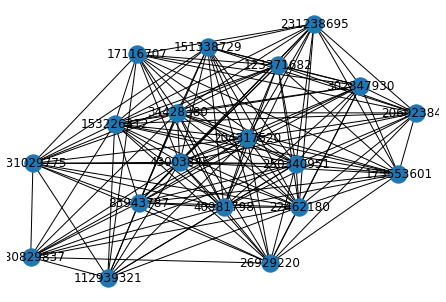

In [10]:
nx.draw(sub_network, with_labels=True)
plt.show()

 Degree centrality (valency) of node of a graph tells us the fraction of nodes a particular node `n` is connected to

In [11]:
nx.degree(sub_network)

DegreeView({'180829837': 11, '175553601': 14, '204317520': 17, '231238695': 14, '123371682': 15, '43003845': 18, '34428380': 18, '17116707': 13, '83943787': 16, '40981798': 18, '151338729': 14, '250340951': 18, '131029775': 14, '112939321': 11, '22462180': 18, '206923844': 14, '302847930': 15, '26929220': 14, '153226312': 18})

Above, the results show no. of connections each node of sub_network has.

Let's analyze connected graphs to the given subgraph

Create list of connected graphs by defining a funtion connected_component_subgraphs()

In [12]:
def connected_component_subgraphs(network):
    for c in nx.connected_components(network):
        return network.subgraph(c)
    

connected_components  = connected_component_subgraphs(sub_network)

Number of nodes for each connected graph

In [13]:
[len(g) for g in connected_components] # the first and largest is most important

[9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 9, 9, 9, 9, 8, 9, 9, 8, 9]

Diameter of Graph: Shows us the maximum eccentricity.

The eccentricity of a node v is the maximum distance from v to all other nodes in G.

In [14]:
# Diameter of the graph
nx.diameter(sub_network)

2

Average shortest path of Graph:

`average shortest path length()` of this network gives us an idea about the number of jumps we need to make around the network to go from one node to any other node in this network.

In [15]:
print(nx.average_shortest_path_length(sub_network))

1.152046783625731


### Visualization using Gephi

In [16]:
nx.write_gexf(sub_network, 'twitter.gexf')

### Results and Conclusions

1) We analyzed twitter dataset in which node depicts user profile and edges depict the networks or profiles each user follows. 

2) We created a subgraph or a subnetwork of the main network and carried analysis on it

3) Sub network consist of 19 nodes and 145 edges in which we analysed `Degree centrality of each node in the graph` which explains fraction of twitter users every user is connected to 

4) Analysed list of connected graphs to subgraph. A limitation in this scenario is restricted information i.e. information of a user profile and the people each user follows could have given much clear analysis of twitter dataset.

5) average shortest path length in subnetwork is approx 1.15 and graph diameter is 2, which tells that each user is closely related to other users/followers. 